#importing necessary library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
data = pd.read_csv('/content/dataset.csv')
data.head()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143,69,217,5.9,0.58,0.23,10.20,116.35,59.96,54.85,21.29,pomegranate
1,170,36,216,5.9,0.15,0.28,15.69,114.20,56.87,31.28,28.62,pomegranate
2,158,66,219,6.8,0.34,0.20,15.29,65.87,51.81,57.12,27.59,pomegranate
3,133,45,207,6.4,0.94,0.21,8.48,103.10,43.81,68.50,47.29,pomegranate
4,132,48,218,6.7,0.54,0.19,5.59,63.40,56.40,46.71,31.04,pomegranate


In [ ]:
data.shape

(620, 12)

In [ ]:
enc.inverse_transform(data['label'].unique())

array(['pomegranate', 'mango', 'grapes', 'mulberry', 'ragi', 'potato'],
      dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       620 non-null    int64  
 1   P       620 non-null    int64  
 2   K       620 non-null    int64  
 3   ph      620 non-null    float64
 4   EC      620 non-null    float64
 5   S       620 non-null    float64
 6   Cu      620 non-null    float64
 7   Fe      620 non-null    float64
 8   Mn      620 non-null    float64
 9   Zn      620 non-null    float64
 10  B       620 non-null    float64
 11  label   620 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 58.2+ KB


In [ ]:
print(data.columns)

Index(['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B', 'label'], dtype='object')


In [ ]:
data.dtypes

,0
N,int64
P,int64
K,int64
ph,float64
EC,float64
S,float64
Cu,float64
Fe,float64
Mn,float64
Zn,float64


In [ ]:
data.describe()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,135.701613,52.508065,161.401613,6.106290,0.885468,0.484085,17.315452,117.212500,219.905887,34.340839,28.750710
std,31.808083,24.673538,81.285780,0.693782,0.637214,5.775388,6.441150,62.775199,341.998793,11.543871,19.636447
min,30.000000,10.000000,51.000000,4.500000,0.010000,0.011100,0.180000,3.810000,20.580000,17.990000,1.020000
25%,116.000000,30.000000,89.000000,5.700000,0.297500,0.086000,12.592500,68.312500,58.785000,24.727500,13.442500
50%,138.000000,54.000000,157.500000,6.100000,0.780000,0.168000,16.910000,108.245000,73.580000,31.425000,23.225000
75%,160.000000,75.000000,206.000000,6.500000,1.390000,0.240000,21.102500,155.620000,163.665000,43.542500,42.767500
max,198.000000,100.000000,369.000000,8.000000,2.480000,113.200000,35.000000,276.720000,1572.540000,70.000000,74.560000


In [ ]:
data.isna().sum()

,0
N,0
P,0
K,0
ph,0
EC,0
S,0
Cu,0
Fe,0
Mn,0
Zn,0


In [ ]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [ ]:
decoded_labels = pd.Series(enc.inverse_transform(data['label']))
counts = decoded_labels.value_counts()
counts

,count
pomegranate,104
mango,104
grapes,104
mulberry,104
ragi,104
potato,100


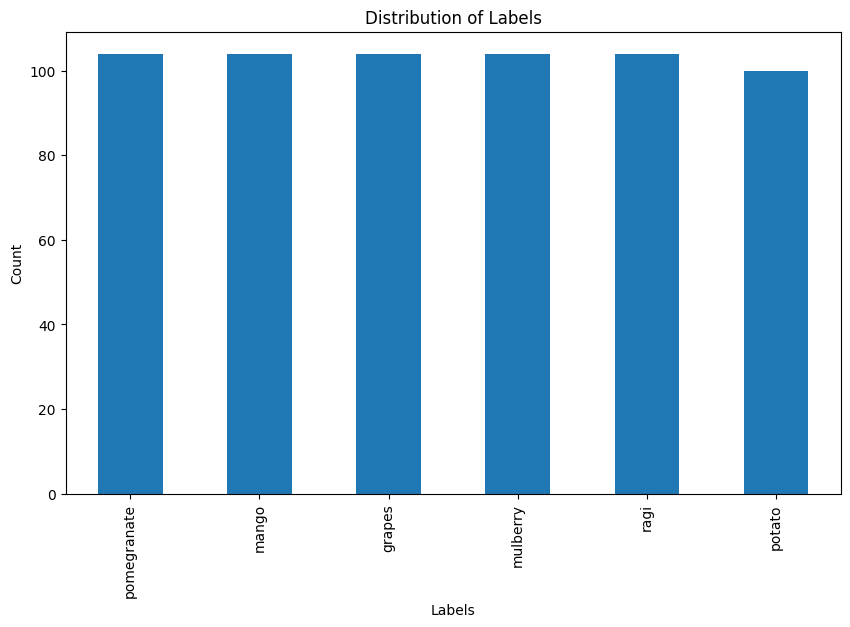

In [ ]:
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [ ]:
enc = LabelEncoder()
data.label = enc.fit_transform(data.label)

In [ ]:
data.head()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143,69,217,5.9,0.58,0.23,10.20,116.35,59.96,54.85,21.29,3
1,170,36,216,5.9,0.15,0.28,15.69,114.20,56.87,31.28,28.62,3
2,158,66,219,6.8,0.34,0.20,15.29,65.87,51.81,57.12,27.59,3
3,133,45,207,6.4,0.94,0.21,8.48,103.10,43.81,68.50,47.29,3
4,132,48,218,6.7,0.54,0.19,5.59,63.40,56.40,46.71,31.04,3


In [ ]:
data.tail()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
615,41,23,135,5.0,1.67,0.10655,26.0,39.2,206.89,31.09,20.64,4
616,49,45,90,5.8,1.98,0.09229,19.0,40.2,91.12,32.68,14.91,4
617,131,24,121,4.9,2.24,0.08775,22.0,40.0,94.34,24.93,23.74,4
618,131,55,130,5.3,2.48,0.08983,15.0,41.0,92.58,45.73,21.48,4
619,129,34,160,4.8,1.08,0.08869,25.0,39.0,259.93,33.49,14.16,4


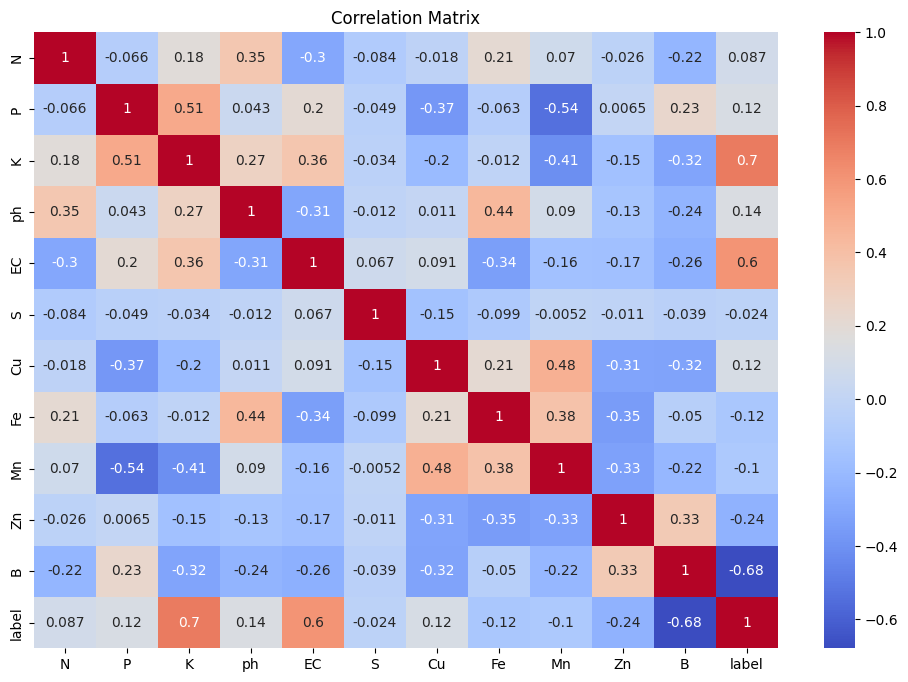

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

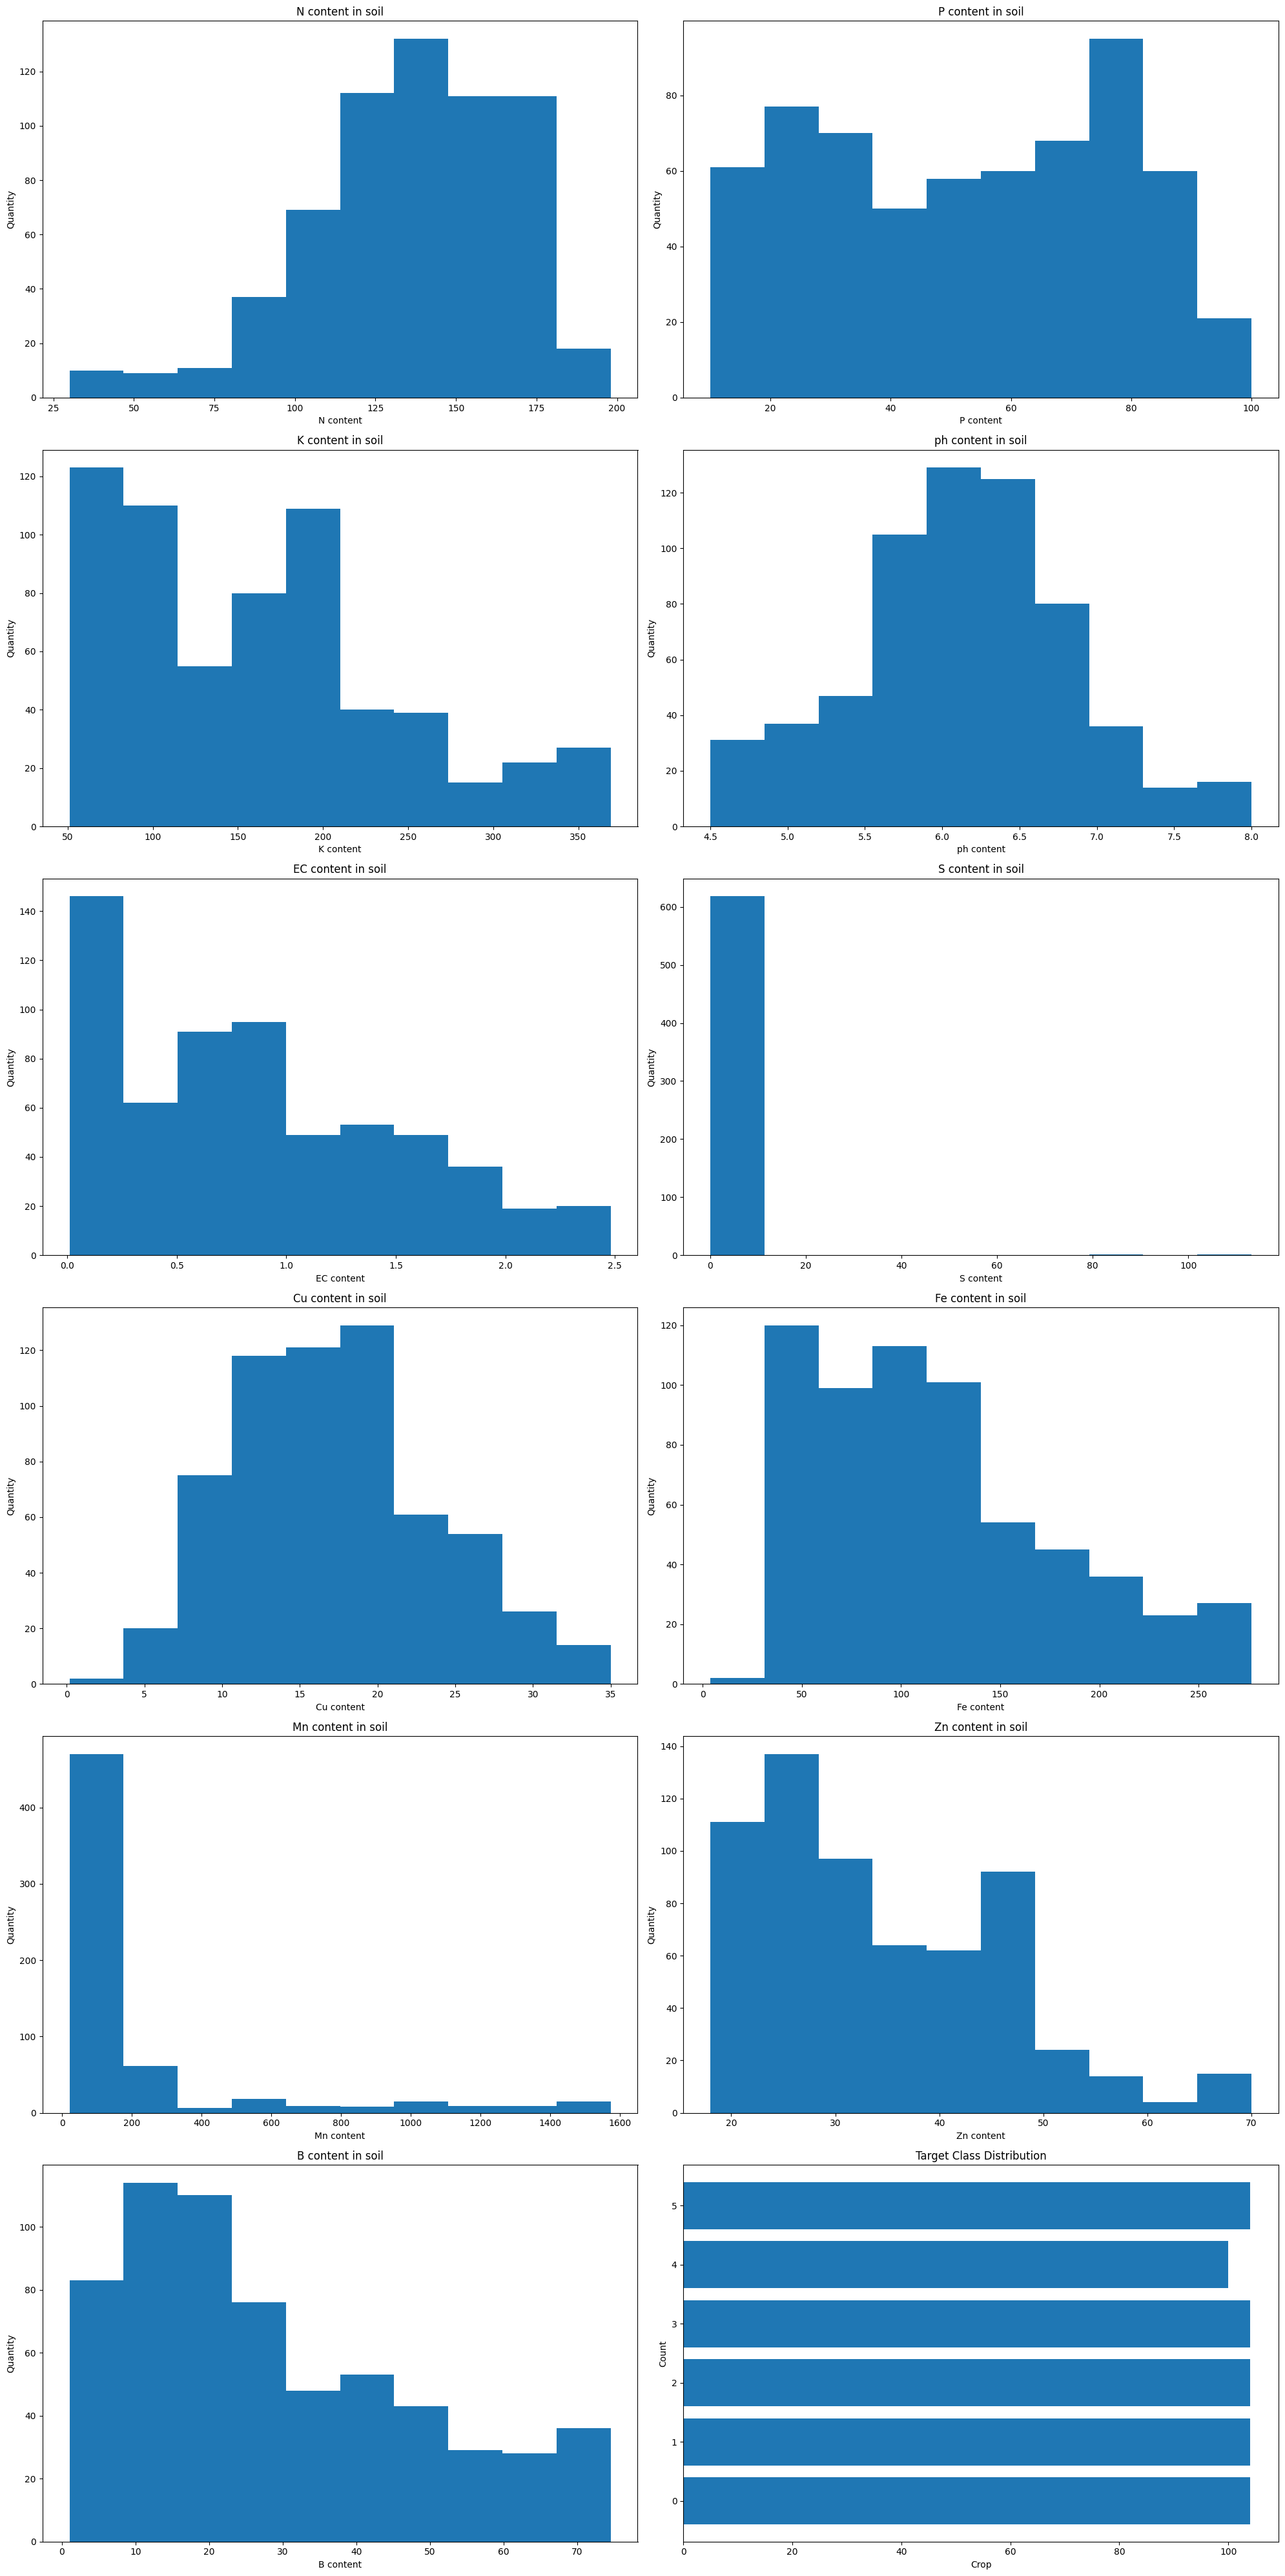

In [ ]:
plt.figure(figsize=(20,40))
pos = 1
for i in data.columns:
    plt.subplot(6,2,pos)
    if i == "label":
        un, count = np.unique(data.label,return_counts=True)
        plt.xlabel("Crop")
        plt.ylabel("Count")
        plt.title("Target Class Distribution")
        plt.barh([enc.classes_[i] for i in un], count)
    else:
        plt.title(i + " content in soil")
        plt.xlabel(i + " content")
        plt.ylabel("Quantity")
        plt.hist(data[i])
    pos=pos+1
plt.tight_layout()

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels = oversample.fit_resample(data.drop(["label"],axis=1), data.label)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(features,labels,test_size=0.2,shuffle=True,random_state=42)

#Alogorithm Impletation

In [ ]:
rf = RandomForestClassifier(n_estimators=15,random_state=42)
rf.fit(train_x, train_y)
y_pred_train_rf = rf.predict(train_x)
y_pred_test_rf = rf.predict(test_x)

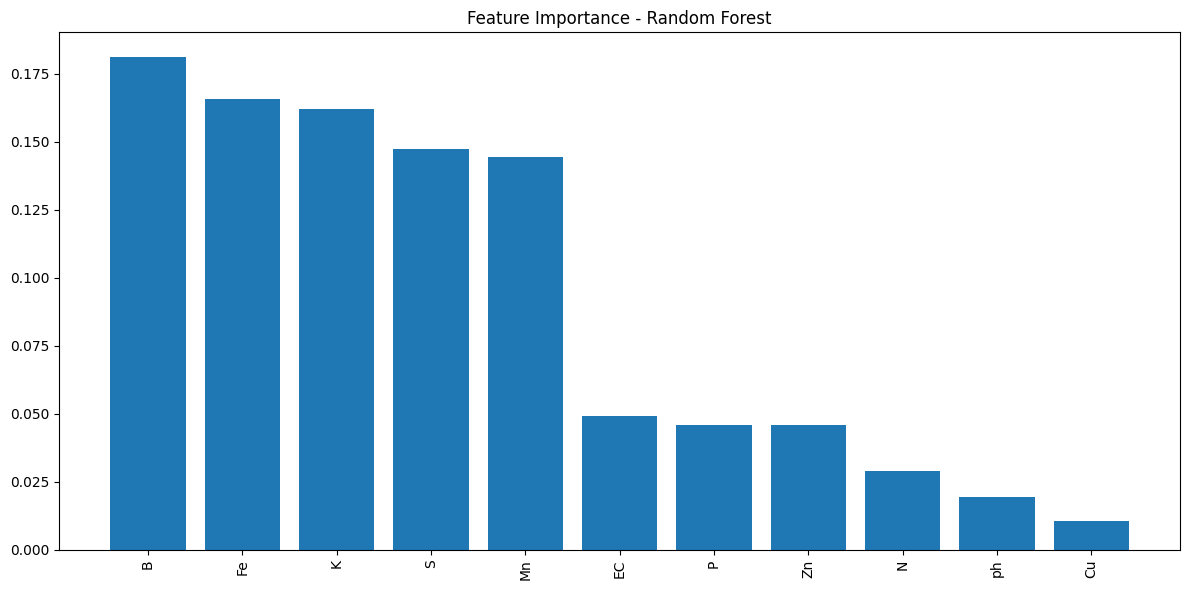

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importance - Random Forest')
plt.bar(range(train_x.shape[1]), importances[indices], align='center')
plt.xticks(range(train_x.shape[1]), [train_x.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


Train Accuracy : 99.20 %
Test Accuracy  : 97.60 %
Precision      : 97.60 %
Recall         : 97.60 %


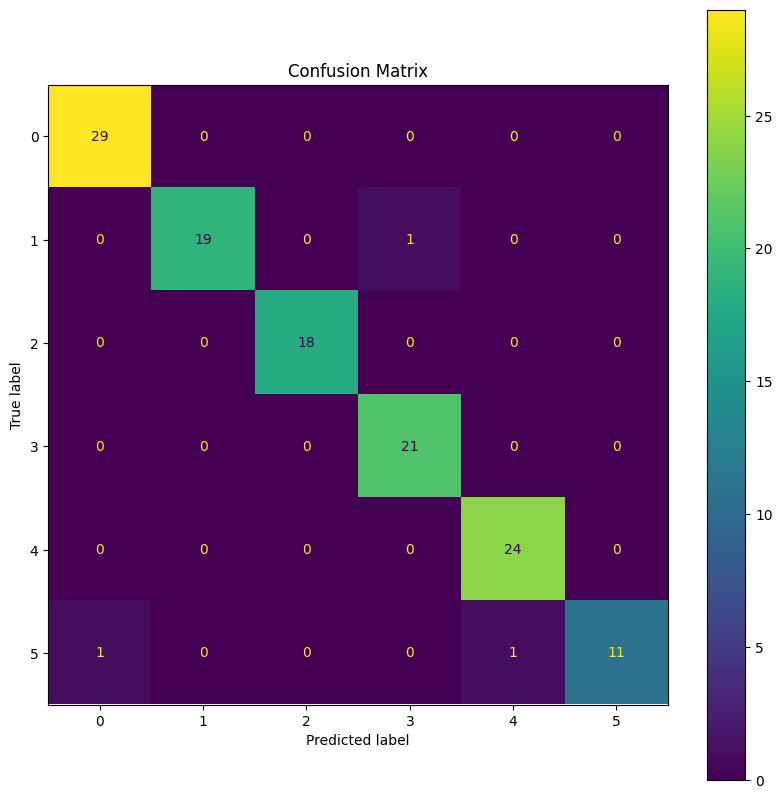

In [ ]:
print("Train Accuracy : {:.2f} %".format(accuracy_score(rf.predict(train_x),train_y)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(rf.predict(test_x),test_y)*100))
print("Precision      : {:.2f} %".format(precision_score(rf.predict(test_x),test_y,average="micro")*100))
print("Recall         : {:.2f} %".format(recall_score(rf.predict(test_x),test_y,average="micro")*100))


cm = confusion_matrix(rf.predict(test_x),test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[enc.classes_[i] for i in rf.classes_])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)
y_pred_train_knn = knn.predict(train_x)
y_pred_test_knn = knn.predict(test_x)

Train Accuracy : 94.99 %
Test Accuracy  : 96.00 %
Precision      : 96.00 %
Recall         : 96.00 %


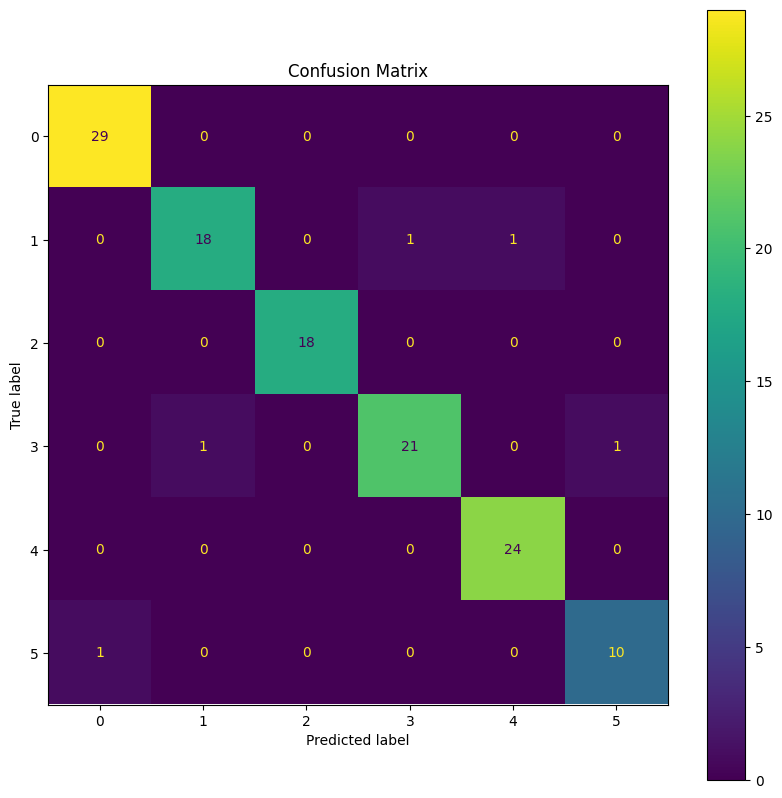

In [ ]:
print("Train Accuracy : {:.2f} %".format(accuracy_score(knn.predict(train_x),train_y)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(knn.predict(test_x),test_y)*100))
print("Precision      : {:.2f} %".format(precision_score(knn.predict(test_x),test_y,average="micro")*100))
print("Recall         : {:.2f} %".format(recall_score(knn.predict(test_x),test_y,average="micro")*100))


cm = confusion_matrix(knn.predict(test_x),test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[enc.classes_[i] for i in knn.classes_])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
log = LogisticRegression(max_iter=2000)
log.fit(train_x, train_y)
y_pred_train_log = log.predict(train_x)
y_pred_test_log = log.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy : 96.59 %
Test Accuracy  : 96.80 %
Precision      : 96.80 %
Recall         : 96.80 %


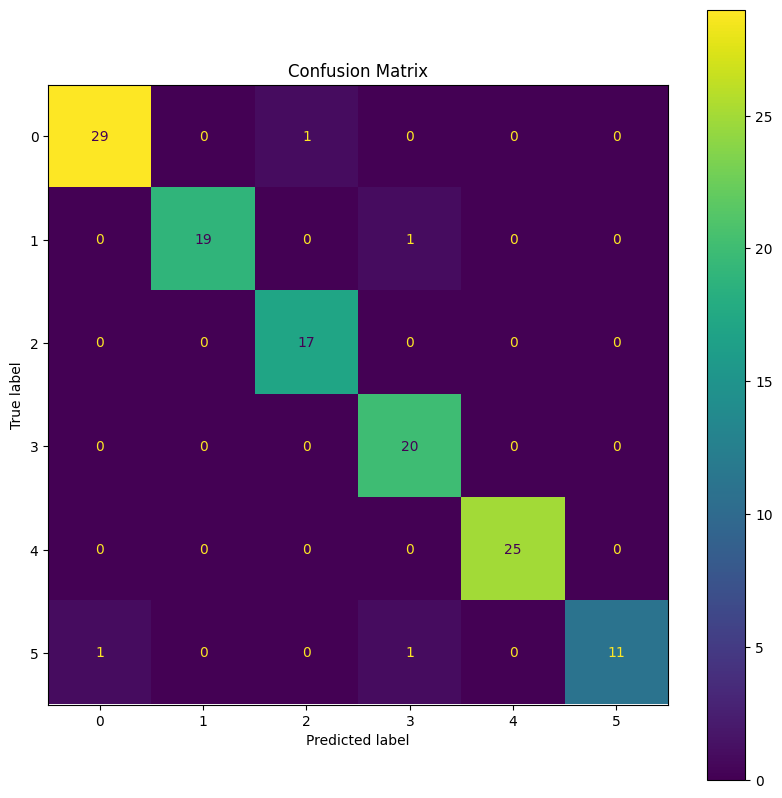

In [ ]:
print("Train Accuracy : {:.2f} %".format(accuracy_score(log.predict(train_x),train_y)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(log.predict(test_x),test_y)*100))
print("Precision      : {:.2f} %".format(precision_score(log.predict(test_x),test_y,average="micro")*100))
print("Recall         : {:.2f} %".format(recall_score(log.predict(test_x),test_y,average="micro")*100))


cm = confusion_matrix(log.predict(test_x),test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[enc.classes_[i] for i in log.classes_])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_x, train_y)
y_pred_train_dt = dt.predict(train_x)
y_pred_test_dt = dt.predict(test_x)

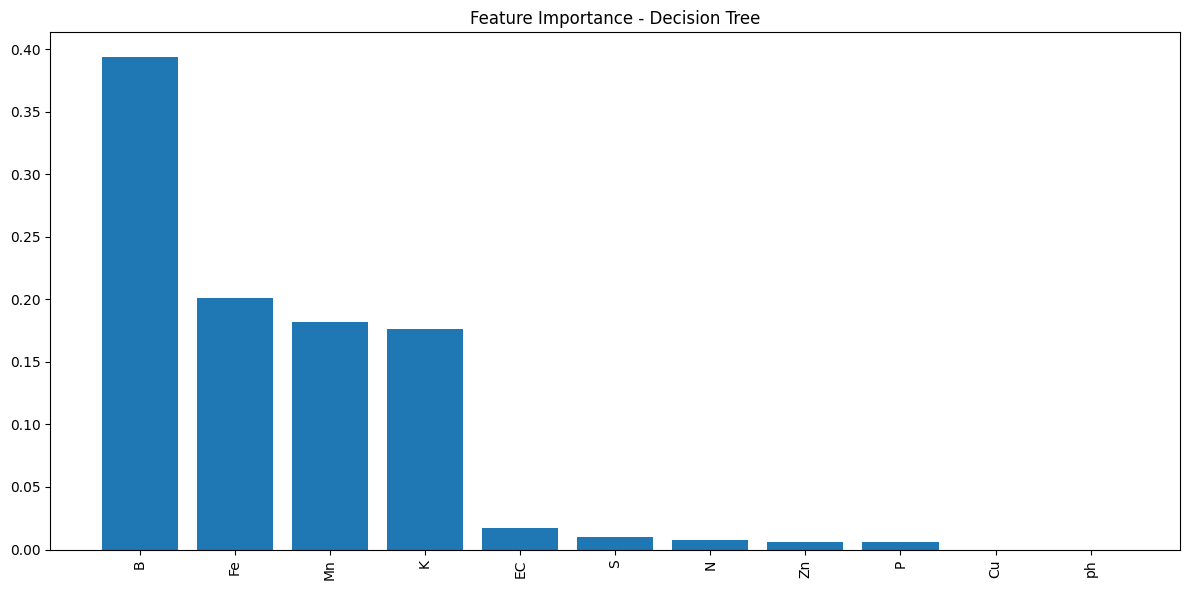

In [ ]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importance - Decision Tree')
plt.bar(range(train_x.shape[1]), importances[indices], align='center')
plt.xticks(range(train_x.shape[1]), [train_x.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

Train Accuracy : 100.00 %
Test Accuracy  : 96.00 %
Precision      : 96.00 %
Recall         : 96.00 %


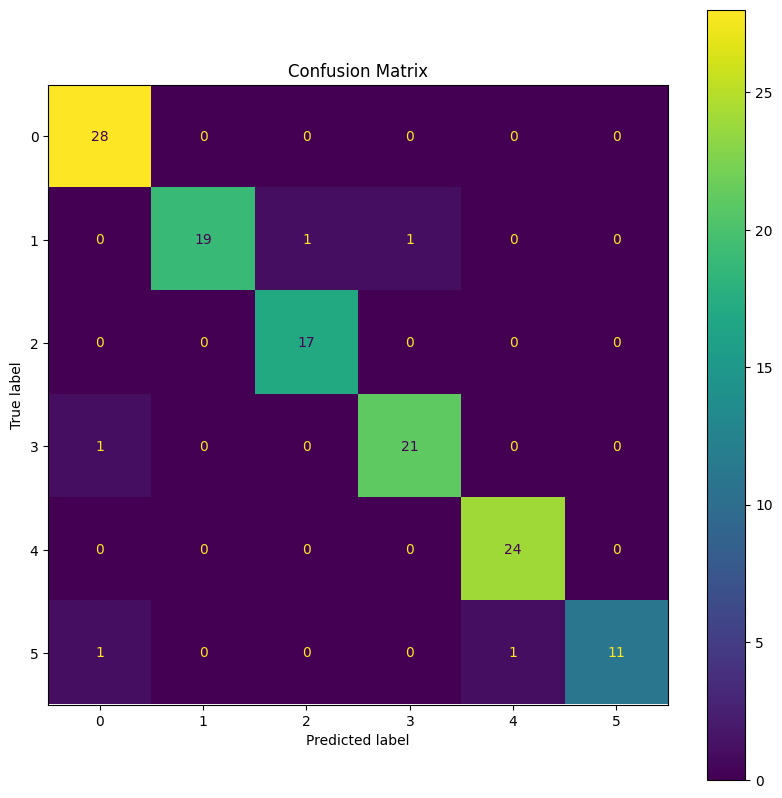

In [ ]:
print("Train Accuracy : {:.2f} %".format(accuracy_score(dt.predict(train_x),train_y)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(dt.predict(test_x),test_y)*100))
print("Precision      : {:.2f} %".format(precision_score(dt.predict(test_x),test_y,average="micro")*100))
print("Recall         : {:.2f} %".format(recall_score(dt.predict(test_x),test_y,average="micro")*100))


cm = confusion_matrix(dt.predict(test_x),test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[enc.classes_[i] for i in dt.classes_])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
result_dict = {'Algorithm': ['Random Forest', 'K Nearest Neighbors', 'Logistic Regression', 'Decision Tree'],
        'Train Accuracy': [accuracy_score(rf.predict(train_x),train_y)*100,
                           accuracy_score(knn.predict(train_x),train_y)*100,
                           accuracy_score(log.predict(train_x),train_y)*100,
                           accuracy_score(dt.predict(train_x),train_y)*100],
        'Test Accuracy': [accuracy_score(rf.predict(test_x),test_y)*100,
                          accuracy_score(knn.predict(test_x),test_y)*100,
                          accuracy_score(log.predict(test_x),test_y)*100,
                          accuracy_score(dt.predict(test_x),test_y)*100],
        'Precision': [precision_score(rf.predict(test_x),test_y,average="micro")*100,
                     precision_score(knn.predict(test_x),test_y,average="micro")*100,
                     precision_score(log.predict(test_x),test_y,average="micro")*100,
                     precision_score(dt.predict(test_x),test_y,average="micro")*100],
        'Recall': [recall_score(rf.predict(test_x),test_y,average="micro")*100,
                  recall_score(knn.predict(test_x),test_y,average="micro")*100,
                  recall_score(log.predict(test_x),test_y,average="micro")*100,
                  recall_score(dt.predict(test_x),test_y,average="micro")*100]
        }

df = pd.DataFrame(result_dict)
df.head()

,Algorithm,Train Accuracy,Test Accuracy,Precision,Recall
0,Random Forest,99.198397,97.6,97.6,97.6
1,K Nearest Neighbors,94.989980,96.0,96.0,96.0
2,Logistic Regression,96.593186,96.8,96.8,96.8
3,Decision Tree,100.000000,96.0,96.0,96.0


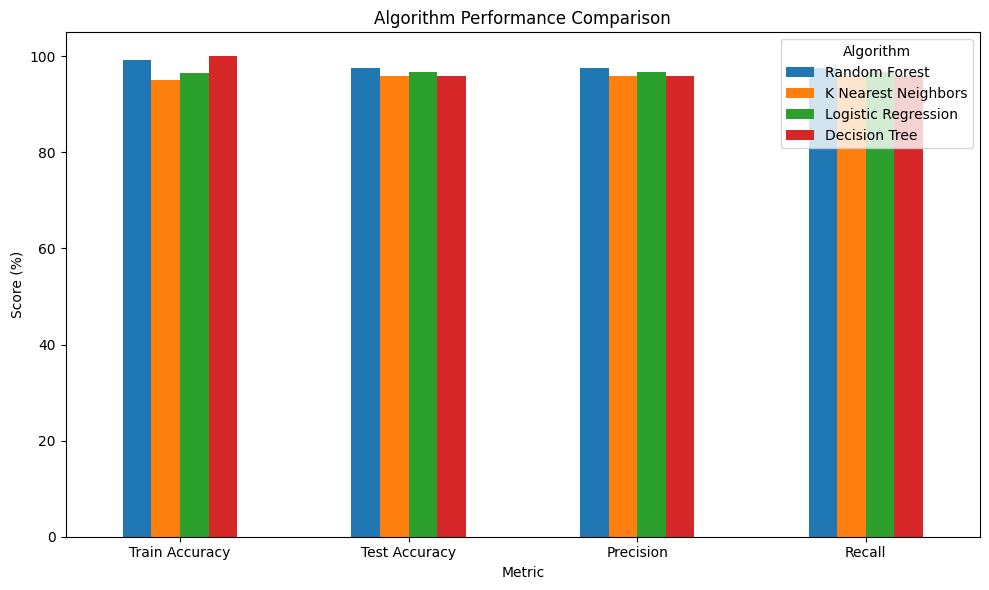

In [ ]:
df_transposed = df.set_index('Algorithm').transpose()

# Create the bar chart
df_transposed.plot(kind='bar', figsize=(10, 6))
plt.title('Algorithm Performance Comparison')
plt.ylabel('Score (%)')
plt.xlabel('Metric')
plt.xticks(rotation=0)
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

#hyperparameter tuning


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f} %".format(grid_search.best_score_ * 100))


Best parameters found:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 96.39 %


In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f} %".format(grid_search.best_score_ * 100))

Best parameters found:  {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best cross-validation score: 95.79 %


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f} %".format(grid_search.best_score_ * 100))

Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score: 96.39 %


In [ ]:
scores = cross_val_score(rf, features, labels, cv=5)
print("Cross-validation scores: ", scores)
print("Mean score: {:.2f} %".format(np.mean(scores) * 100))

Cross-validation scores:  [1.         1.         1.         1.         0.83870968]
Mean score: 96.77 %


In [ ]:
scores = cross_val_score(dt, features, labels, cv=5)
print("Decision Tree Cross-validation scores: ", scores)
print("Mean score: {:.2f} %".format(np.mean(scores) * 100))

Decision Tree Cross-validation scores:  [0.976      0.976      0.976      0.984      0.83870968]
Mean score: 95.01 %


In [ ]:
scores = cross_val_score(knn, features, labels, cv=5)
print("KNN Cross-validation scores: ", scores)
print("Mean score: {:.2f} %".format(np.mean(scores) * 100))

KNN Cross-validation scores:  [0.992      0.984      0.984      0.984      0.82258065]
Mean score: 95.33 %


In [ ]:
scores = cross_val_score(log, features, labels, cv=5)
print("Logistic Regression Cross-validation scores: ", scores)
print("Mean score: {:.2f} %".format(np.mean(scores) * 100))

#Model Selection basis of Voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('rf', rf), ('log', log), ('knn', knn)], voting='hard')
ensemble.fit(train_x, train_y)
print("Ensemble Accuracy: {:.2f} %".format(ensemble.score(test_x, test_y) * 100))


Ensemble Accuracy: 98.40 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Dumping the Model

In [ ]:
import pickle
with open('ensemble_model.pkl', 'wb') as model_file:
    pickle.dump((ensemble, enc), model_file)

NameError: name 'ensemble' is not defined